In [6]:
import pandas as pd
wine_data=pd.read_csv('winequality-red.csv')


In [7]:
wine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [8]:
wine_data.isna().sum()


fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

(array([ 45., 229., 542., 371., 188., 110.,  76.,  26.,   5.,   7.]),
 array([ 4.6 ,  5.73,  6.86,  7.99,  9.12, 10.25, 11.38, 12.51, 13.64,
        14.77, 15.9 ]),
 <a list of 10 Patch objects>)

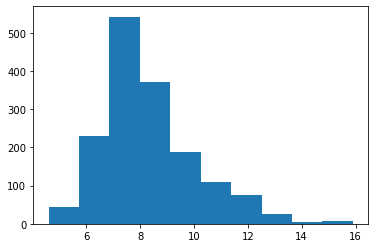

In [10]:
import matplotlib.pyplot as plt
plt.hist(wine_data['fixed acidity'])

(array([ 73., 405., 423., 475., 148.,  51.,  18.,   3.,   2.,   1.]),
 array([0.12 , 0.266, 0.412, 0.558, 0.704, 0.85 , 0.996, 1.142, 1.288,
        1.434, 1.58 ]),
 <a list of 10 Patch objects>)

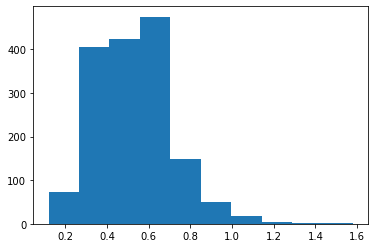

In [11]:
plt.hist(wine_data['volatile acidity'])

(array([403., 203., 316., 205., 262., 132.,  62.,  15.,   0.,   1.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

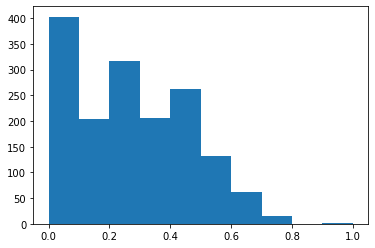

In [13]:
plt.hist(wine_data['citric acid'])

(array([994., 463.,  67.,  45.,  11.,   8.,   3.,   0.,   5.,   3.]),
 array([ 0.9 ,  2.36,  3.82,  5.28,  6.74,  8.2 ,  9.66, 11.12, 12.58,
        14.04, 15.5 ]),
 <a list of 10 Patch objects>)

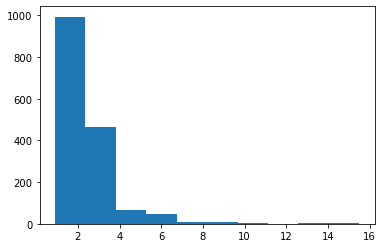

In [14]:
plt.hist(wine_data['residual sugar'])

(array([ 457., 1064.,   35.,   18.,    3.,    8.,   10.,    2.,    0.,
           2.]),
 array([0.012 , 0.0719, 0.1318, 0.1917, 0.2516, 0.3115, 0.3714, 0.4313,
        0.4912, 0.5511, 0.611 ]),
 <a list of 10 Patch objects>)

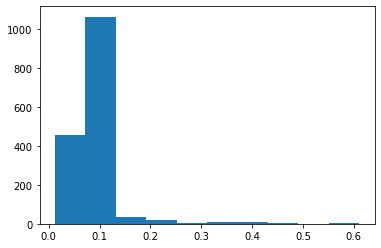

In [15]:
plt.hist(wine_data['chlorides'])

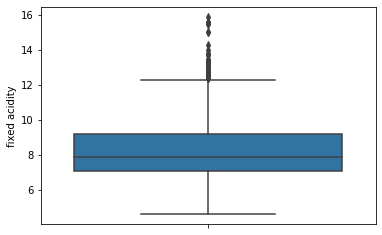

In [17]:
import seaborn as sns
sns.boxplot(y=wine_data['fixed acidity'])

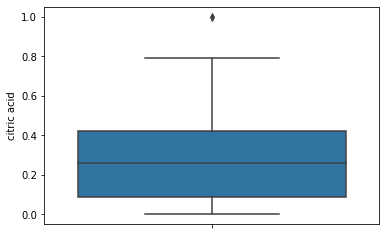

In [19]:
sns.boxplot(y=wine_data['citric acid'])

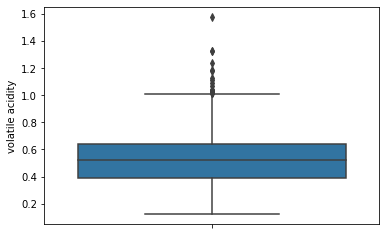

In [21]:
sns.boxplot(y=wine_data['volatile acidity'])

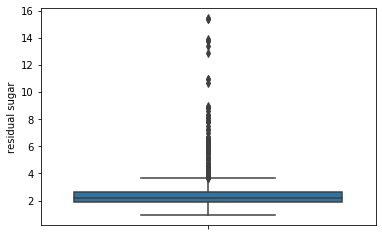

In [22]:
sns.boxplot(y=wine_data['residual sugar'])

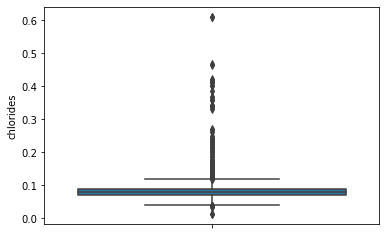

In [24]:
sns.boxplot(y=wine_data.iloc[:,4])

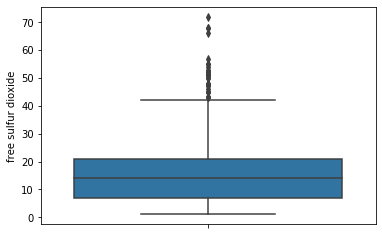

In [25]:
sns.boxplot(y=wine_data.iloc[:,5])

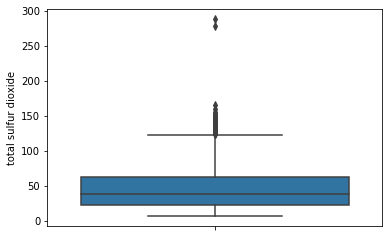

In [26]:
sns.boxplot(y=wine_data.iloc[:,6])

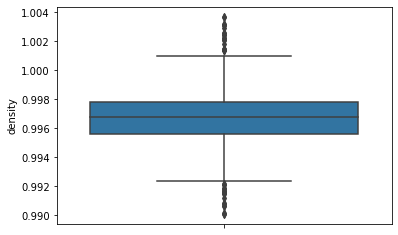

In [27]:
sns.boxplot(y=wine_data.iloc[:,7])

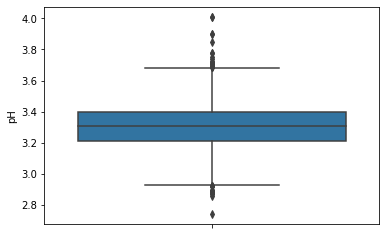

In [28]:
sns.boxplot(y=wine_data.iloc[:,8])

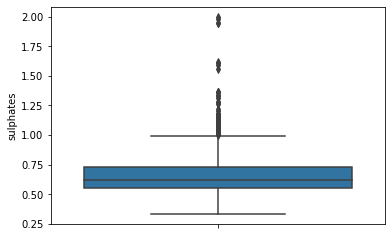

In [29]:
sns.boxplot(y=wine_data.iloc[:,9])

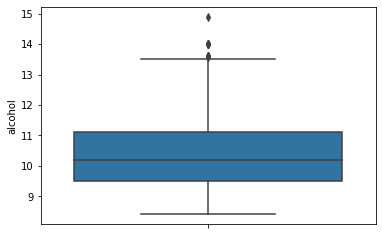

In [30]:
sns.boxplot(y=wine_data.iloc[:,10])

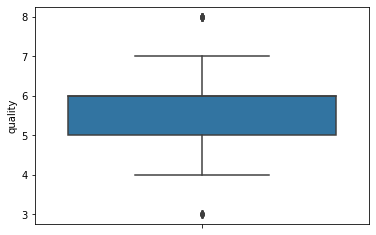

In [31]:
sns.boxplot(y=wine_data.iloc[:,11])

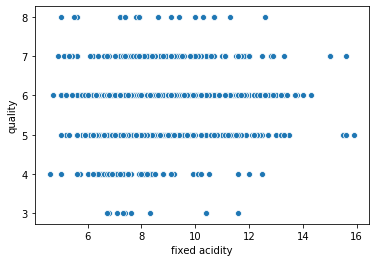

In [33]:
sns.scatterplot(x=wine_data.iloc[:,0],y=wine_data.iloc[:,11])

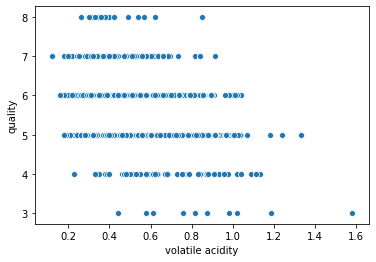

In [36]:
sns.scatterplot(x=wine_data.iloc[:,1],y=wine_data.iloc[:,11])

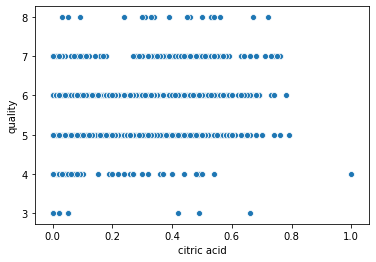

In [37]:
sns.scatterplot(x=wine_data.iloc[:,2],y=wine_data.iloc[:,11])

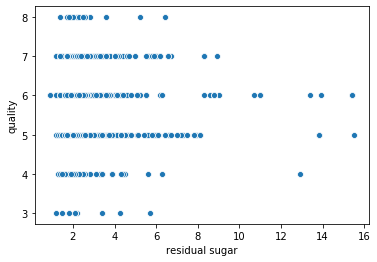

In [38]:
sns.scatterplot(x=wine_data.iloc[:,3],y=wine_data.iloc[:,11])

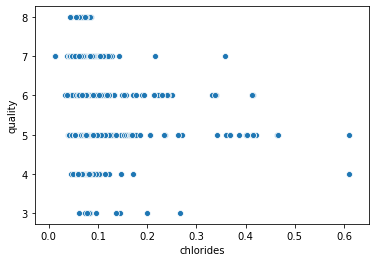

In [39]:
sns.scatterplot(x=wine_data.iloc[:,4],y=wine_data.iloc[:,11])

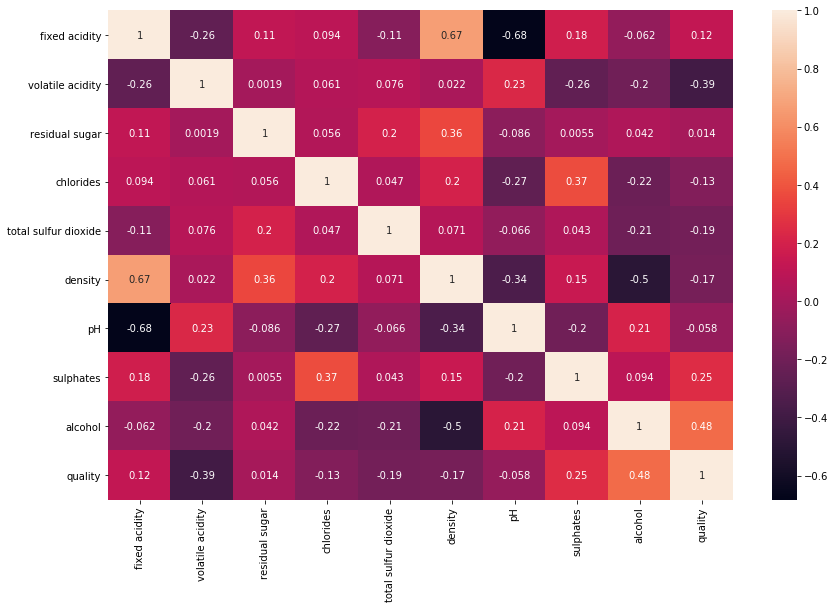

In [85]:
plt.figure(figsize=[14,9])
sns.heatmap(wine_data.corr(),annot=True)

In [83]:
wine_data.drop('free sulfur dioxide',axis=1,inplace=True)
wine_data.drop('citric acid',axis=1,inplace=True)

KeyError: "['free sulfur dioxide'] not found in axis"

In [96]:
X = wine_data.loc[:,wine_data.columns!='quality' ].values
Y=wine_data['quality']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size=0.25, random_state=3)
print(X_train.shape)
X_test.shape

(1199, 9)


(400, 9)

In [97]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [98]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 1)
classifier.fit(X_train, y_train)

classifier.score(X_test,y_test)

0.66